# Week-1 Assignment

# **Gotta catch 'em all !**

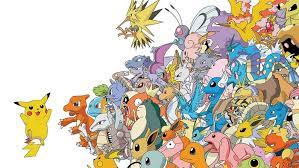

**Welcome to your first graded assignment! Hope that you are excited to implement and test everything you have learnt up until now. The dataset which you'll use includes information about Pokemons.**

**We have got an interesting set of questions for you to get a basic understanding of pandas and data visualization libraries. GOOD LUCK!**


***Let's get started with importing numpy, pandas, seaborn and matplotlib!***

Note - matplotlib should be imported with the command :

 `import matplotlib.pyplot as plt`

### 1) Start by importing all important libraries
For eg, "import numpy as np"

In [11]:
from collections import Counter
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 2) Read the csv file and assign it to a variable .

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
df = pd.read_csv('/content/drive/MyDrive/W1_Pokemon.csv')

### 3) Display shape of dataframe
Expected Output - (800, 13)

In [14]:
print(f'Shape of DataFrame : {df.shape}')

Shape of DataFrame : (800, 13)


### 4) Print all columns of dataframe
Return an array containing names of all the columns.

In [15]:
print(f'Columns of DataFrame : {df.columns}')

Columns of DataFrame : Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')


### 5) Remove the column '#' and update the dataframe.

In [16]:
df.drop(df.columns[0] , axis = 1)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


### 6) Set the 'Name' column as the index of dataframe

In [17]:
df = df.set_index('Name')

###  7) Print a list of all the unique Type-1 powers

In [18]:
print(f'List of all unique Type 1 powers : {df["Type 1"].unique()}')

List of all unique Type 1 powers : ['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']


### 8) Create a column which contains the Type 1 and Type 2 abilities of pokemons, seperated with a '+'' sign. Also, display the no. of pokemons that have type-1 power as 'Psychic' and type 2 power as 'Flying' using this new column.

In [19]:
df['Type 1 + Type 2'] = df['Type 1'] + '+' + df['Type 2']
poi_psy = df[(df['Type 1'] == 'Psychic') & (df['Type 2'] == 'Flying')]
print(f"{len(poi_psy)} pokemons that have type-1 power as 'Psychic' and type 2 power as 'Flying'.")

6 pokemons that have type-1 power as 'Psychic' and type 2 power as 'Flying'.


## GRADED Questions (To be answered in the quiz)
### Try to retrieve some information from the data and answer the questions below . BEST OF LUCK !!

### 1. How many pokemons have 'Mega' in their name?

In [21]:
megas = list(df[df.index.str.contains('Mega ')].index)
print(f"{len(megas)} pokemons have 'Mega' in their name.")

48 pokemons have 'Mega' in their name.


### 2. What is the standard deviation of Sp. Def. in the dataset ?

In [22]:
std_dev = df['Sp. Def'].std()
print(f"Standard deviation of Sp. Def. in the dataset : {std_dev}")

# alternate method
# np.std(df['Sp. Def'])

Standard deviation of Sp. Def. in the dataset : 27.82891579711745


### 3. What percentage (upto 3 decimal places) of pokemons are legendary ?

In [23]:
legends = list(df[df['Legendary']==True].index)
total = list(df.index)
print(f"{round(len(legends) / len(total), 3)}% pokemons are legendary.")

0.081% pokemons are legendary.


### 4. Name the pokemon(s) with Maximum Defense.

In [28]:
max_def = df['Defense'].max()
def_name = list(df[df['Defense'] == max_def].index)
print('Pokemon(s) with maximum defense is/are :')
for i in def_name:
  print(i)

Pokemon(s) with maximum defense is/are :
SteelixMega Steelix
Shuckle
AggronMega Aggron


### 5. Which poison pokemon has the strongest attack ?

In [30]:
poi_atk = df[(df['Type 1'] == 'Poison') | (df['Type 2'] == 'Poison')]
max_atk = poi_atk['Attack'].max()
atk_name = list(poi_atk[poi_atk['Attack'] == max_atk].index)
print('Poison pokemon which has the strongest attack is/are :')
for i in atk_name:
  print(i)

Poison pokemon which has the strongest attack is/are :
BeedrillMega Beedrill


### 6. Using seaborn make different types of plots, observe the trend and answer the questions given in the form.

Detects outliners as well as helpful for comparision of speeds between types of pokemon


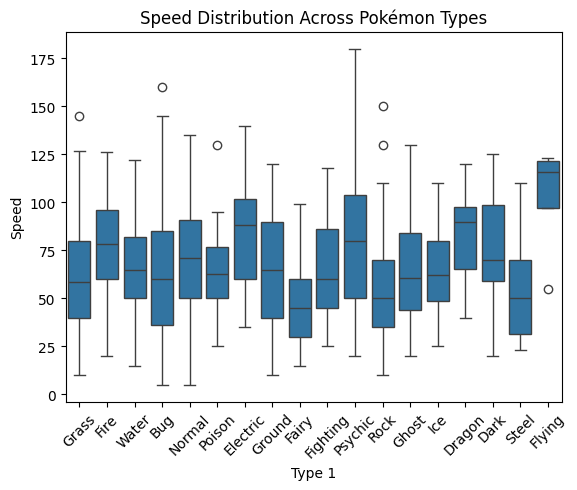

In [121]:
sns.boxplot(x='Type 1', y='Speed', data=df)
plt.title('Speed Distribution Across Pokémon Types')
plt.xticks(rotation=45);
print('Detects outliners as well as helpful for comparision of speeds between types of pokemon')
plt.show()

Text(0.5, 1.0, 'Defense vs HP')

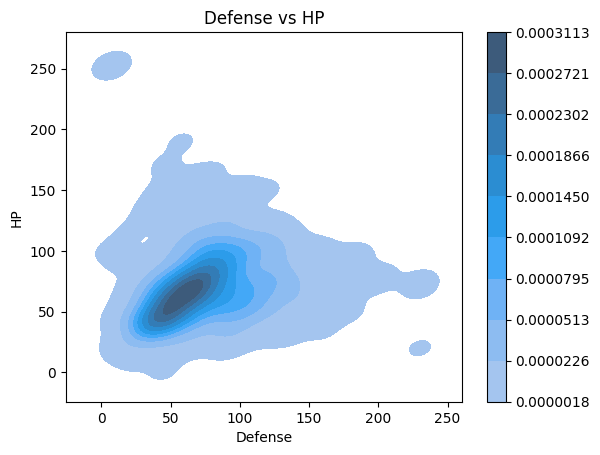

In [129]:
sns.kdeplot(x=df.Defense, y=df.HP, fill=True , thresh=0.01, cbar=True);
plt.title('Defense vs HP')

Can detect outliners


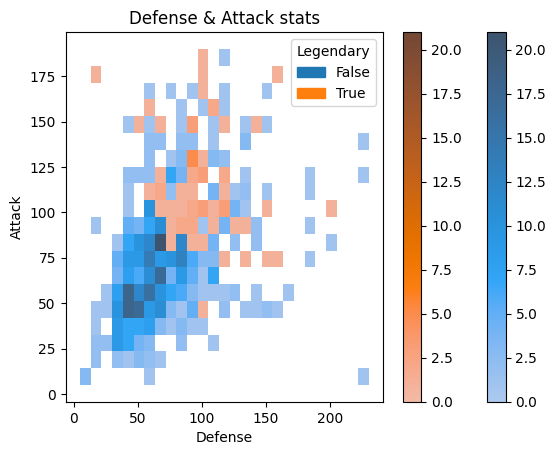

In [124]:
sns.histplot(x = 'Defense' , y = 'Attack' , data = df , cbar=True , hue='Legendary');
plt.title('Defense & Attack stats')
print('Can detect outliners')
plt.show()

Logic behind order = 6 : Total stat is affected by 6 stats in total


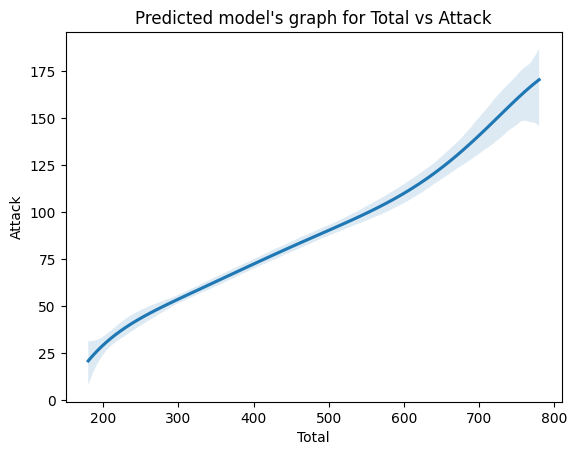

In [130]:
sns.regplot(x='Total' , y='Attack' , data = df , order=6 , scatter = False);
plt.title("Predicted model's graph for Total vs Attack")
print('Logic behind order = 6 : Total stat is affected by 6 stats in total')
plt.show()

### 7. Which is the second fastest non-legendary 'Ghost' type pokemon from 4th generation ?

In [103]:
adv_df = df[(df['Generation']==4) & ((df['Type 1']=='Ghost') | (df['Type 2']=='Ghost')) & (df['Legendary']==False)]
adv_df = adv_df.sort_values('Speed' , ascending = False)
print(f"The second fastest non-legendary 'Ghost' type pokemon from 4th generation : {adv_df.iloc[1].name}")

The second fastest non-legendary 'Ghost' type pokemon from 4th generation : Mismagius


### 8. How many non-legendary pokemons have stronger defence but weaker attack than Charizard?

In [100]:
chari_atk = df[df.index == 'Charizard']['Attack'].iloc[0]
chari_def = df[df.index == 'Charizard']['Defense'].iloc[0]

comp_df = df[(df['Legendary']==False) & (df['Defense'] > chari_def) & (df['Attack'] < chari_atk)]
print(f"{len(comp_df)} non-legendary pokemons have stronger defence but weaker attack than Charizard.")

116 non-legendary pokemons have stronger defence but weaker attack than Charizard.



## ***Bonus Questions***
## Here are some bonus questions that you can try further !

### These questions are UNGRADED, and are given as an extra exercise.

### Which pokemon has the highest combined value of Attack and Sp. Atk ?

In [106]:
df['combine'] = df['Attack'] + df['Sp. Atk']
max_combine = df['combine'].max()
max_combine_name = list(df[df['combine'] == max_combine].index)
print('Pokemon has the highest combined value of Attack and Sp. Atk : ')
for i in max_combine_name :
  print(i)

Pokemon has the highest combined value of Attack and Sp. Atk : 
RayquazaMega Rayquaza
DeoxysAttack Forme


### Which type of legendary pokemons are the most common?

In [107]:
legend_types = df[df['Legendary']]['Type 1'].value_counts().to_dict()
common = list(legend_types.keys())[0]
print(f"{common} type pokemons are the most common.")

Psychic type pokemons are the most common.


### How many generation-3, non-legendary pokemons have higher HP than the weakest generation-6, legendary pokemon?

In [108]:
weak = df[(df['Generation']==6) & (df['Legendary']==True)]
weak.sort_values('HP')
weak.index = range(0, len(weak))
weak_legend = min(weak['HP'])

result = df[(df['Generation']==3) & (df['Legendary']==False) & (df['HP'] < weak_legend)]
print(f"{len(result)} generation-3, non-legendary pokemons have higher HP than the weakest generation-6, legendary pokemon.")

31 generation-3, non-legendary pokemons have higher HP than the weakest generation-6, legendary pokemon.


### Print out the third slowest pokemon(s) in the dataset.

In [110]:
speeds = df['Speed'].unique()
speeds = list(speeds)
speeds = sorted(speeds)
slow_stat = speeds[2]
slow_name = list(df[df['Speed'] == slow_stat].index)
print("The third slowest pokemon(s) in the dataset :")
for i in slow_name :
  print(i)

The third slowest pokemon(s) in the dataset :
Slowpoke
Cleffa
Igglybuff
Wooper
Pineco
Silcoon
Cascoon
Roggenrola
Foongus


### Which pokemon type has the highest average HP?

In [111]:
df_hp = df.groupby(['Type 1'])['HP'].mean().sort_values(ascending=False)
print(f"{df_hp.idxmax()} type pokemon has the highest average HP")

Dragon type pokemon has the highest average HP
